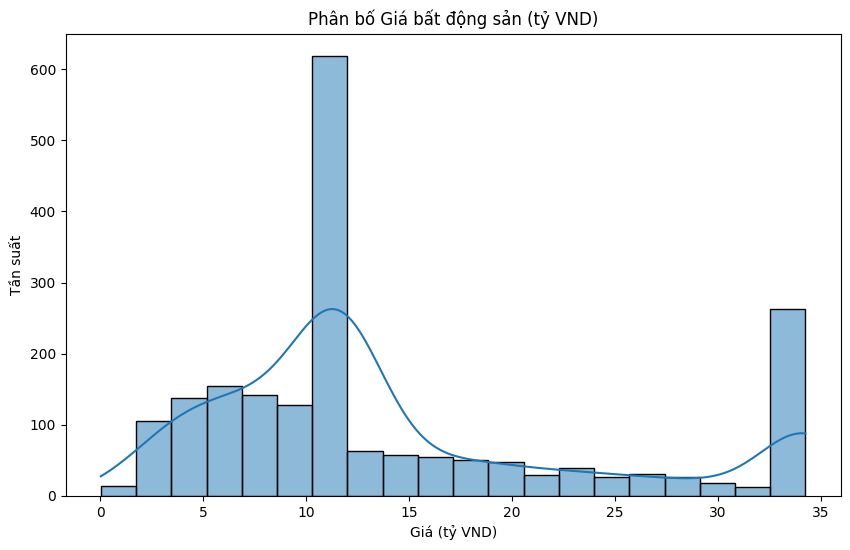

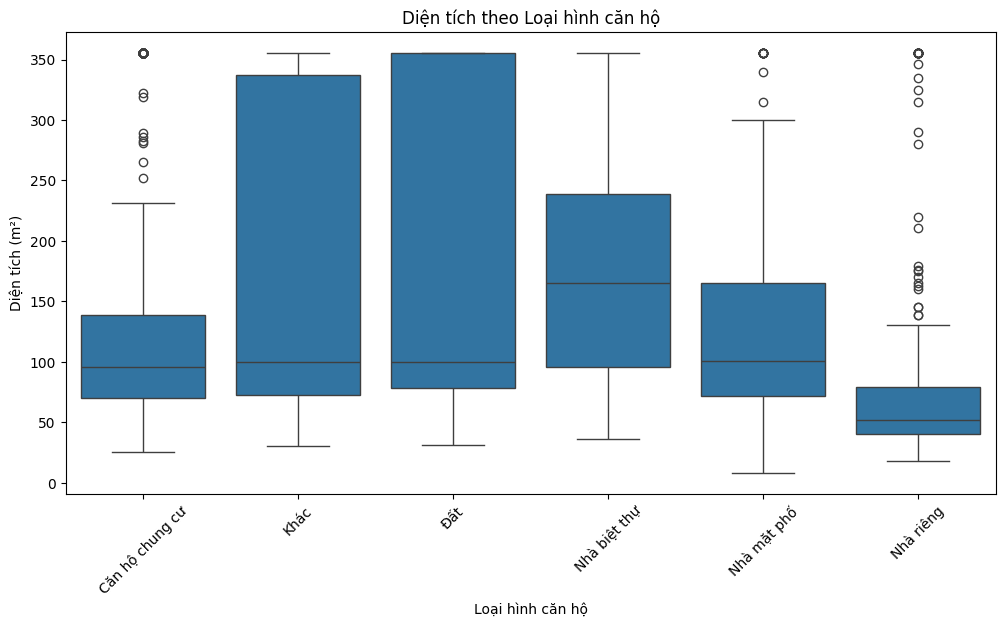

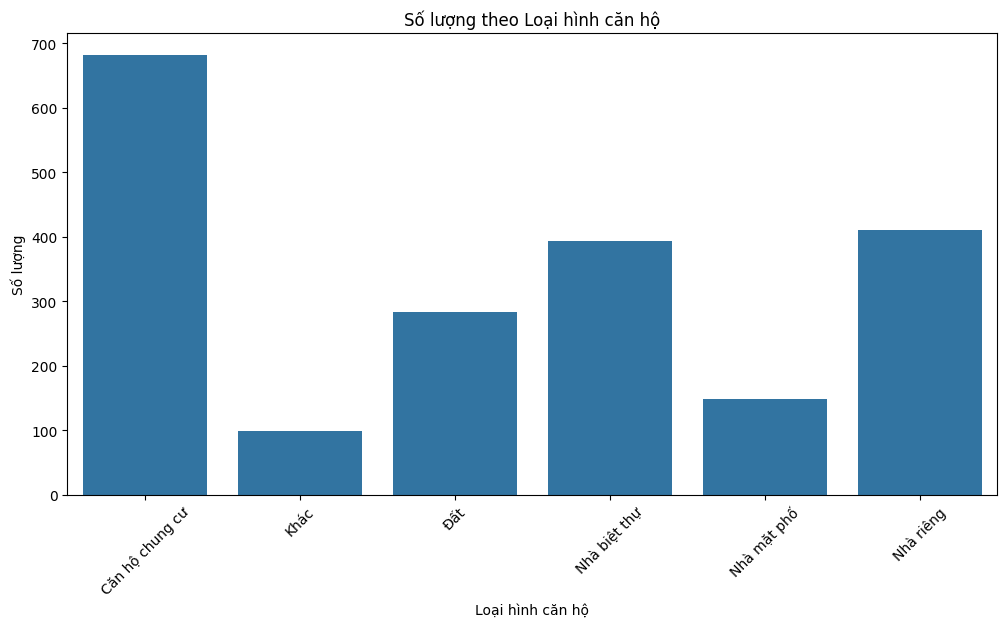

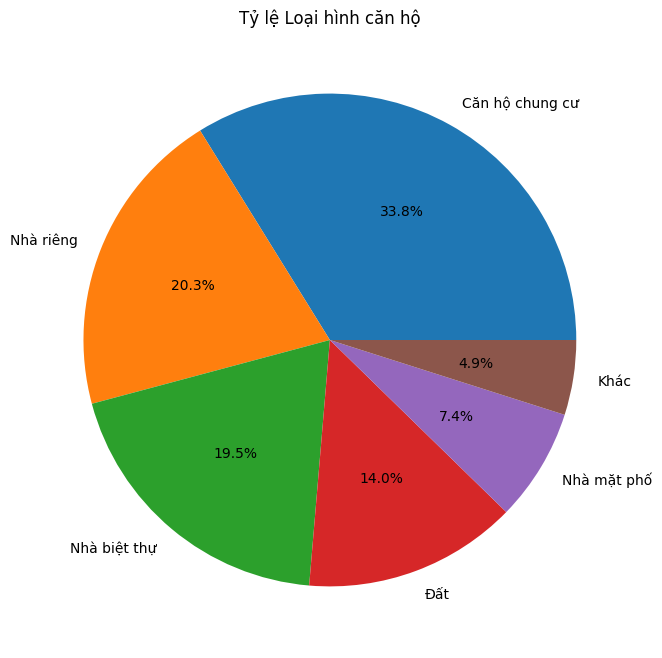

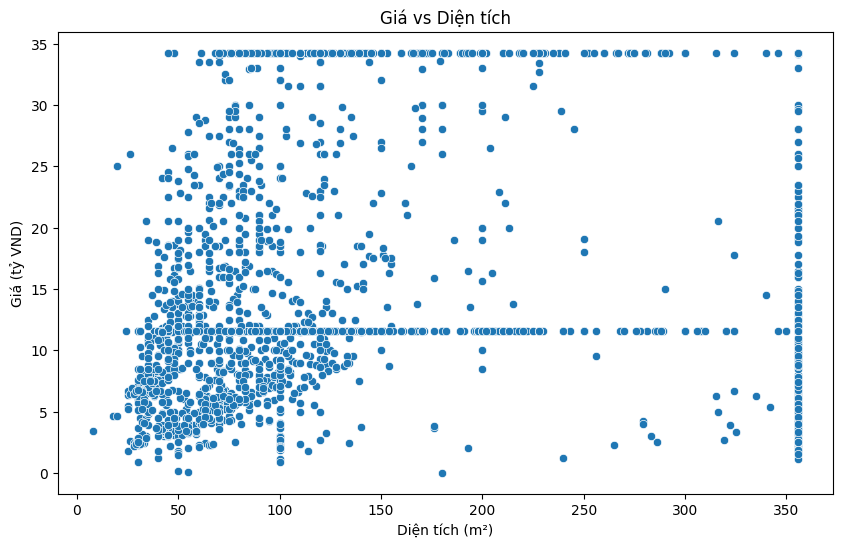

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('bds_clean_grouped.csv')

# Basic cleaning: Replace placeholder values like 355.5 or 0.0 with NaN if needed
# For simplicity, we'll filter out invalid values in plots where necessary
df['Gia_VND'] = df['Gia_VND'] / 1e9  # Convert to billion VND for easier plotting
df = df[df['Diện tích (m²) đã làm sạch'] > 0]  # Filter invalid area
df = df[df['Gia_VND'] > 0]  # Filter invalid price

# Group 'Loại hình căn hộ' into simpler categories for better visualization
def simplify_type(row):
    if 'Căn hộ chung cư' in row:
        return 'Căn hộ chung cư'
    elif 'Nhà riêng' in row:
        return 'Nhà riêng'
    elif 'Nhà mặt phố ' in row:
        return 'Nhà mặt phố'
    elif 'Nhà biệt thự' in row:
        return 'Nhà biệt thự'
    elif 'Bán đất tại' in row:
        return 'Đất'
    else:
        return 'Khác'

df['Loại hình giản hóa'] = df['Loại hình căn hộ'].apply(simplify_type)

# 1. Histogram examples
# Histogram for Gia_VND
plt.figure(figsize=(10, 6))
sns.histplot(df['Gia_VND'], bins=20, kde=True)
plt.title('Phân bố Giá bất động sản (tỷ VND)')
plt.xlabel('Giá (tỷ VND)')
plt.ylabel('Tần suất')
plt.show()


# 2. Boxplot examples
# Boxplot for Diện tích by Loại hình căn hộ
plt.figure(figsize=(12, 6))
sns.boxplot(x='Loại hình giản hóa', y='Diện tích (m²) đã làm sạch', data=df)
plt.title('Diện tích theo Loại hình căn hộ')
plt.xlabel('Loại hình căn hộ')
plt.ylabel('Diện tích (m²)')
plt.xticks(rotation=45)
plt.show()


# 3. Bar chart examples
# Bar for count of Loại hình căn hộ
plt.figure(figsize=(12, 6))
sns.countplot(x='Loại hình giản hóa', data=df)
plt.title('Số lượng theo Loại hình căn hộ')
plt.xlabel('Loại hình căn hộ')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()


# 4. Pie chart examples
# Pie for Loại hình căn hộ (simplified)
plt.figure(figsize=(8, 8))
df['Loại hình giản hóa'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Tỷ lệ Loại hình căn hộ')
plt.ylabel('')
plt.show()

# 5. Scatter plot examples
# Scatter for Gia_VND vs Diện tích
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diện tích (m²) đã làm sạch', y='Gia_VND', data=df)
plt.title('Giá vs Diện tích')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá (tỷ VND)')
plt.show()

